<a href="https://colab.research.google.com/github/hzhoujoy/HW4_ST554/blob/main/HW4_JoyZhou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Home Work 4
Author: Huiping Zhou
Date: 2/5/2026
```

# Summarizing Student Data Graphically

## Bring in Homework 3 Code
- Copy your code and markdown cells from homework 3 that read in the data and summarized it
numerically.
- We were essentially starting an EDA there.
- Our goal is to now add to this basic EDA by including graphs that describe the variables.

# Summarizing Data Numerically
The [`StudentData.txt`](https://www4.stat.ncsu.edu/online/datasets/StudentData.txt) dataset will be used in this section. This dataset is from the [the UCI machine learning repository](https://archive.ics.uci.edu/dataset/320/student+performance). The information of interested variabls dee below:
- school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex: student's sex (binary: 'F' - female or 'M' - male)
- age: student's age(numeric: from 15 to 22)
- Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- internet: Internet access at home (binary: yes or no)
- address: student's home address type (binary: 'U' - urban or 'R' - rural)
- absences: number of school absences (numeric: from 0 to 93)
- G1: first period grade (numeric: from 0 to 20)
- G2: second period grade (numeric: from 0 to 20)
- G3: final grade (numeric: from 0 to 20, output target)





Read in the data


In [ ]:
import pandas as pd
math_score = pd.read_csv(
    "https://www4.stat.ncsu.edu/online/datasets/StudentData.txt",
    sep=";"
)
math_score.head() #check the first few observations

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Categorical variables

Now we want to convert some of the variables to category type variables. We can do that quickly using the `.apply()` method and a `lambda` function.


In [ ]:
#Convert three categorical variables into cateogry type variables
math_score[["school","sex","Pstatus", "address", "higher", "internet"]] = (
    math_score[["school","sex","Pstatus","address", "higher", "internet"]]
    .apply(lambda x: x.astype("category"))
)

#check the variable types after conversion
math_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

Let's create a `one-way table` of the parent sratus (Pstatus) varibale to see  see how many students' parent living together or apart


In [ ]:
#create a one-way table using Pstatus
table_1_way = math_score.Pstatus.value_counts(dropna = False)
table_1_way

,count
Pstatus,
T,354
A,41


Interpretation: Among the 395 students, the one-way table shows that 354 students' parents live together, whereas 41 students' parents live apart.

Next, let's do a `two-way table` between parental living status(Pstatus) and plans for higher education (higher) to understand the breakdown of those two variables.


In [ ]:
table_2_way = pd.crosstab(math_score["Pstatus"], math_score["higher"])
table_2_way

higher,no,yes
Pstatus,,
A,1,40
T,19,335


We will use `pandas` to visualize the two-way contingency table between `Pstatus` and `higher`.

Text(0.5, 1.0, 'Desire for Higher Education by Parent Status')

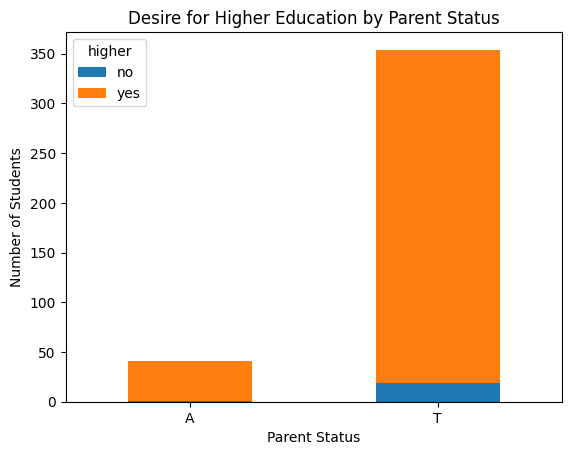

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#stacked bar plots for two-way table
table_2_way.plot.bar(stacked = True, rot = 0)
plt.xlabel("Parent Status")
plt.ylabel("Number of Students")
plt.title("Desire for Higher Education by Parent Status")

Text(0.5, 1.0, 'Desire for Higher Education by Parent Status')

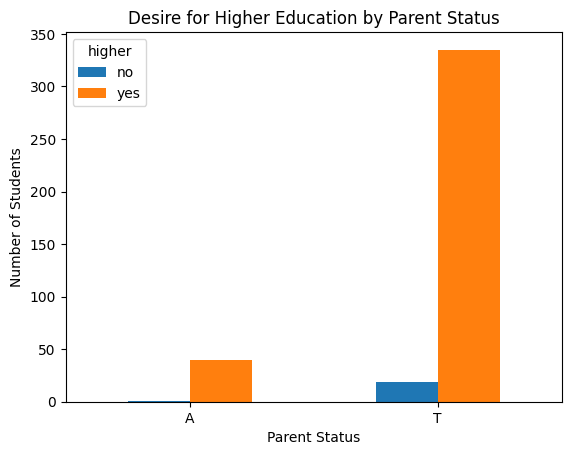

In [ ]:
# side-by side bar plot for two-way table
table_2_way.plot.bar(rot = 0)
plt.xlabel("Parent Status")
plt.ylabel("Number of Students")
plt.title("Desire for Higher Education by Parent Status")

Interpretation: The two-way table and plots sumarizes student count by parental living status(Pstatus) and plans for higher education (higher). Among the 41 students whose parents live apart, 40 plan to pursue higher education. Among the 354 students whose parents live together, 335 plan to pursue higher education, while 19 do not.

Let's extend this to a `three-way table`. This will allow us to understand how the Pstatus, internet access at home (internet), and desire for higher education (higher) of the students is distributed.
 three-way contingency table

In [ ]:
#create a three-way table
table_3_way = pd.crosstab(
    [math_score.Pstatus, math_score.higher], #pass a list of columns for the rows
    math_score.internet
    )
table_3_way

internet        no  yes
Pstatus higher         
A       no       0    1
        yes     10   30
T       no       4   15
        yes     52  283

We will use pandas to visualize the three-way contingency table showing the relationship among `Pstatus`, `higher`, and `internet`.

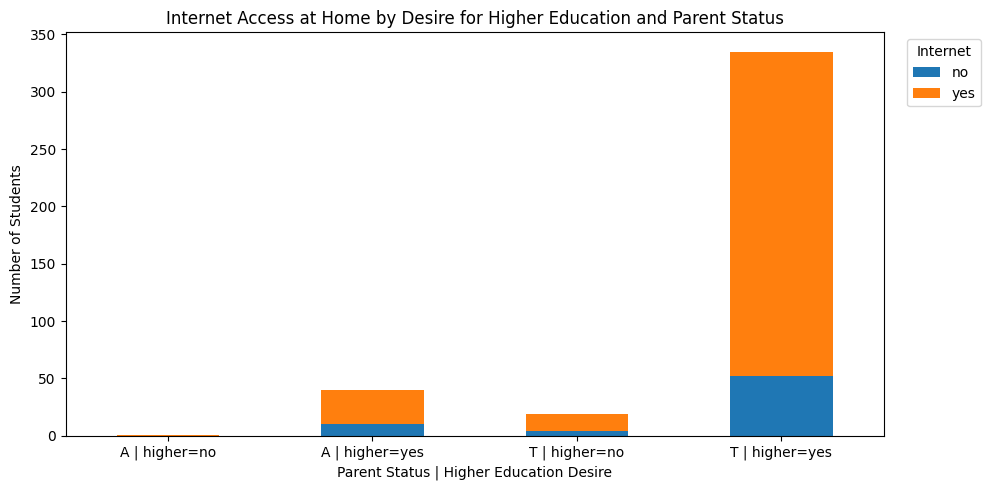

In [ ]:
import matplotlib.pyplot as plt
#stacked bar plot for three-way table
ax = table_3_way.plot(kind="bar", stacked = True, rot=0, figsize=(10,5))

# Make MultiIndex labels cleaner: "Apart | higher=no"
ax.set_xticklabels([f"{p} | higher={h}" for p, h in table_3_way.index], rotation=0)
ax.set_xlabel("Parent Status | Higher Education Desire")
ax.set_ylabel("Number of Students")
ax.set_title("Internet Access at Home by Desire for Higher Education and Parent Status")
ax.legend(title="Internet", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

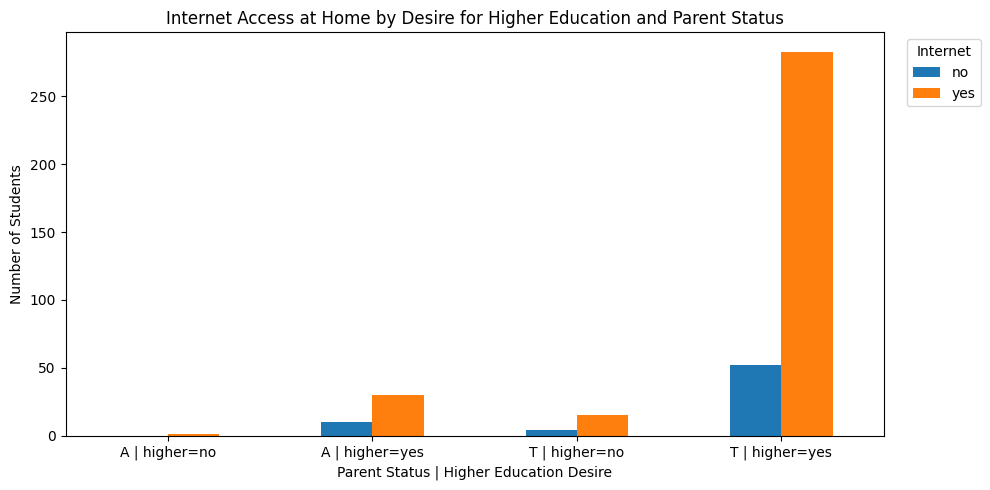

In [ ]:
import matplotlib.pyplot as plt
#side-by-side bar for three-way table
plot = table_3_way.plot(kind="bar", rot=0, figsize=(10,5))

# Make MultiIndex labels cleaner: "Apart | higher=no"
plot.set_xticklabels([f"{p} | higher={h}" for p, h in table_3_way.index], rotation=0)
plot.set_xlabel("Parent Status | Higher Education Desire")
plot.set_ylabel("Number of Students")
plot.set_title("Internet Access at Home by Desire for Higher Education and Parent Status")
plot.legend(title="Internet", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

This three-way table and bar plots summarize student counts by parental living status (Pstatus), internet access at home, and plans for higher education. Among students whose parents live apart (n=41), 40 plan to pursue higher education, and 10 report no internet access. Among students whose parents live together (n=354), 335 plan to pursue higher education, and 56 report no internet access. Overall, most students plan to pursue higher education (375 of 395), and lack of internet access is more prevalent in the "parents apart" group (10/41) than in the “parents together” group (56/354).

Now we'll condition on a variable and create a two-way table. Here we'll subset the data to only show students from the "GP" school and then do a two-way table between sex and address.

In [ ]:
#Create a conditional two-way table (eg., sex by higher) by subsetting the data
#Subset the data
sub_math_score = math_score.loc[math_score['school'] == 'GP']
len(sub_math_score)  #check number of observation for GP school

349

In [ ]:
#creat the table using the subsetted data
tableC = pd.crosstab(
    sub_math_score.sex,
    sub_math_score.higher,
    margins = True
    )
tableC

higher,no,yes,All
sex,,,
F,4,179,183
M,13,153,166
All,17,332,349


This two-way table summarizes 349 students from Gabriel Pereira (`GP`) school. Among these students,  183 female and 166 are male.
Out os the 183 femal students, 179 plan to pursue higher education, while 153 out of 166 male students plant to pursue hingher education.

- Creating a three-way table and subsetting it

In [ ]:
my_table = pd.crosstab(
    [math_score.sex, math_score.higher], #pass a list of columns for the rows
    math_score.school,
    margins = True)
my_table

school       GP  MS  All
sex higher              
F   no        4   0    4
    yes     179  25  204
M   no       13   3   16
    yes     153  18  171
All         349  46  395

In [ ]:
# subset the table
my_table['GP'] #access the scool data using a column label

sex  higher
F    no          4
     yes       179
M    no         13
     yes       153
All            349
Name: GP, dtype: int64

The subset of the three‑way table for sex, wants to take higher education (higher0, and school shows that among 349 students from Gabriel Pereira (GP) school, 183 are female and 166 are male. Of these students, 179 out of 183 females and 153 out of 166 males plan to pursue higher education. This result is the same as that obtained by first subsetting the data by school == 'GP' and then constructing a two‑way table of sex by higher.

### Numeric variables (and across groups)
The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

- Find measures of center (mean and median) and spread (standard deviation and variance) for three of these variables (including G3 as one of them)

In [ ]:
#Find measures of center and spresd for age, absence, and G3
math_score[['age', 'absences', 'G3']].agg(['mean','median','std','var']).round(decimals = 2)

,age,absences,G3
mean,16.70,5.71,10.42
median,17.00,4.00,11.00
std,1.28,8.00,4.58
var,1.63,64.05,20.99


The average age of students is 16.7 and the median is 17. The small standard deviation (1.28) indicates that most students are close in age.The average number of absences is 5.71, while the the median is 4, suggesting a right- skewed distribution. Absences also show a large variability, as reflected by a standard deviation of 8. The standard deviation of absences is 8, which is quit large! For the final grade (G3), the mean and median are very similar, indicating a fairly symmetric distribution, and the spread is moderate with a standard deviation of 4.58.


- Now we will repeat the above process but subset the data  by the variable `sex` using `.loc[]` method to only look at female students.

In [ ]:
math_score_sex = math_score.loc[math_score['sex'] == 'F'] #subset by sex
math_score_sex[['age', 'absences',  'G3']].agg(['mean','median','std','var']).round(2)

,age,absences,G3
mean,16.73,6.22,9.97
median,17.00,4.00,10.00
std,1.20,9.45,4.62
var,1.44,89.22,21.37


We see there are slightly more absences on average for the female students but the median is still the same. The final grades also appear to be lower on average.


Next, we check measures of center and spread across a single grouping variable (`school`) for three of these variables (age, G2, G3).   
- we can use the `pivot_table()` fruction and the `.agg()` method to find measure of center and spread across groups.
    

In [ ]:
pd.pivot_table(
    math_score,
    values = ["age", "G2", "G3"],  # the columns we want to summarize
    index = "school",              # grouping variable
    aggfunc = ["mean", "median", "std", "var"], #the aggregation functions
    observed=True
).round(2)

mean               median               std                var  \
           G2     G3    age     G2    G3   age    G2    G3   age     G2   
school                                                                    
GP      10.78  10.49  16.52   11.0  11.0  16.0  3.81  4.63  1.22  14.50   
MS      10.20   9.85  18.02   10.0  10.0  18.0  3.38  4.24  0.88  11.41   

                     
           G3   age  
school               
GP      21.39  1.48  
MS      17.95  0.78

The means and medians are pretty close for age, second period grade (G2), and final grade(G3), indicatiing fairly symmetric distribution. GP school students have slightly higher average G2 and G3 scores than MS students. GP students are also younger on average, with a mean age of 16.52 versus 18.02 at MS.



Let's break it down even further by looking at the measures across school and sex.


In [ ]:
#Find measures of center and spread across two grouping variables (e.g., school,sex) for three of these variables (age, G2, G3)

pd.pivot_table(
    math_score,
    values = ["age", "G2", "G3"],
    index = ["school","sex"],
    aggfunc = ["mean", "median", "std", "var"],
    observed=True
).round(decimals=2)

mean               median               std                var  \
               G2     G3    age     G2    G3   age    G2    G3   age     G2   
school sex                                                                    
GP     F    10.40   9.97  16.58   10.0  11.0  16.0  3.65  4.60  1.17  13.30   
       M    11.20  11.06  16.46   11.0  11.0  16.0  3.95  4.59  1.26  15.58   
MS     F    10.32   9.92  17.84   10.0  10.0  18.0  3.68  4.85  0.75  13.56   
       M    10.05   9.76  18.24   10.0  10.0  18.0  3.06  3.49  1.00   9.35   

                         
               G3   age  
school sex               
GP     F    21.20  1.38  
       M    21.11  1.60  
MS     F    23.49  0.56  
       M    12.19  0.99

There are only small differences in average age between males and females across the two schools, though students at MS are older on average than those at GP. Male students at GP have the highest G2 and G3 scores compared to females at GP and both males and females at MS. In contrast, there are no large differences in G2 and G3 scores between males and females at MS.



- Create a correlation matrix between all of the numeric variables

In [ ]:
math_score[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


We will visualize the numerical variables using histograms, kernel density plots, and boxplots. Two numerical variables (G3, absences)will be examined across one categorical variable (address) to compare their distributions across groups. At least one kernel density plot will overlay multiple groups on the same graph. All plots will include appropriate titles, labels, and legends.

In [ ]:
#manually set up bins
bin_ends = 10
bins = [i*max(math_score.G3)/bin_ends for i in range(0, bin_ends + 1)]
print(bins)

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]


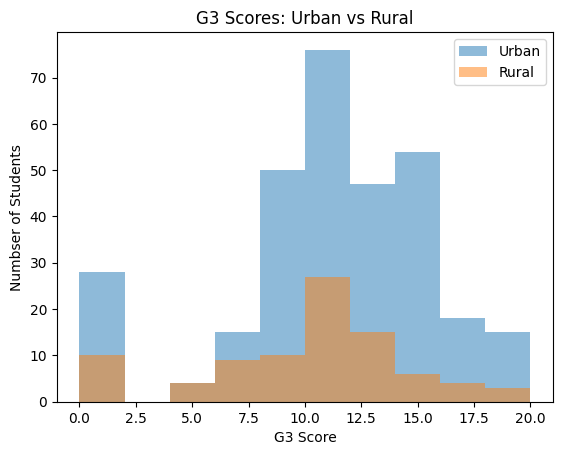

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Histogram comparing G3 scores for student address (urban vs rural)
address_U = math_score.loc[math_score["address"] == "U", "G3"] #series for urban
address_R = math_score.loc[math_score["address"] == "R", "G3"] #series for rural
address_U.plot.hist(bins = bins, alpha = 0.5, label = "Urban",
                    title = "G3 Scores: Urban vs Rural")
address_R.plot.hist(bins = bins, alpha = 0.5, label = "Rural")
plt.xlabel("G3 Score")
plt.ylabel("Numbser of Students")
plt.legend()

The histogram shows that G3 scores for both urban and rural students are concentrated between 10 and 12. Urban students have higher frequencies across most score ranges, including this interval, which likely reflects a larger urban sample size rather than a meaningful difference in the distribution of scores.

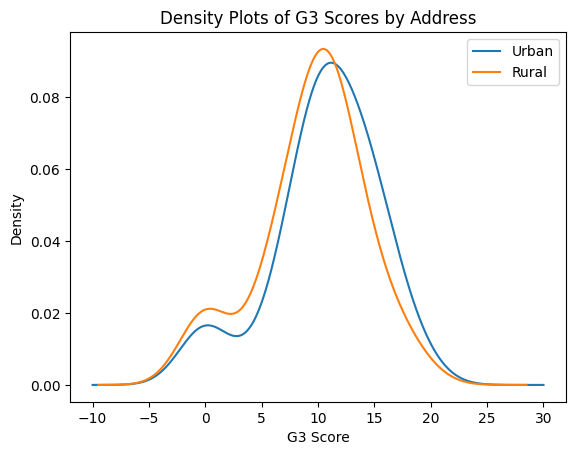

In [ ]:
# kernel density plots comparing G3 scores for student address (urban vs rural)
address_U.plot.density(bw_method = 0.5, label = "Urban")
address_R.plot.density(bw_method = 0.5, label = "Rural")
plt.title("Density Plots of G3 Scores by Address")
plt.xlabel("G3 Score")
plt.legend()

The density curves overlap heavily, indicating similar performance overall. However, the urban distribution is slightly shifted to the right, suggesting urban students tend to score a bit higher on average (with a peak around 11-12) compared to rural students (peak around 10-11).

Text(0.5, 0.98, '')

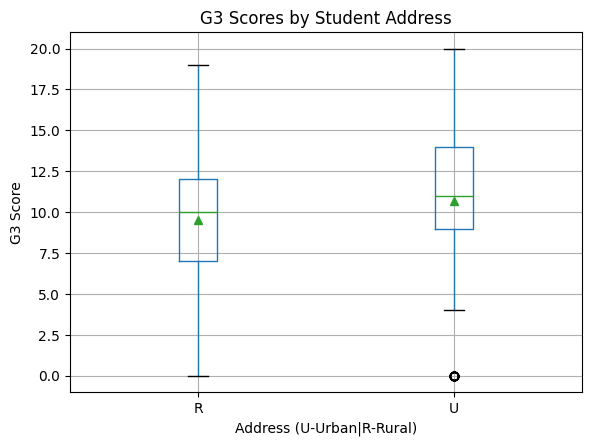

In [ ]:
import matplotlib.pyplot as plt

#boxplot comparing G3 scores for student address (urban vs rural)
math_score.boxplot(column = "G3", by = "address", showmeans = True)
plt.ylabel("G3 Score")
plt.xlabel("Address (U-Urban|R-Rural)")
plt.title("G3 Scores by Student Address") # Add a descriptive title
plt.suptitle("") # Suppress the default suptitle generated by boxplot

The boxplot shows that urban students have a higher central tendency (both mean and median) in final scores compared to rural students. In addition, rural students display greater variability, as indicated by a wider interquartile range and a longer lower whisker.

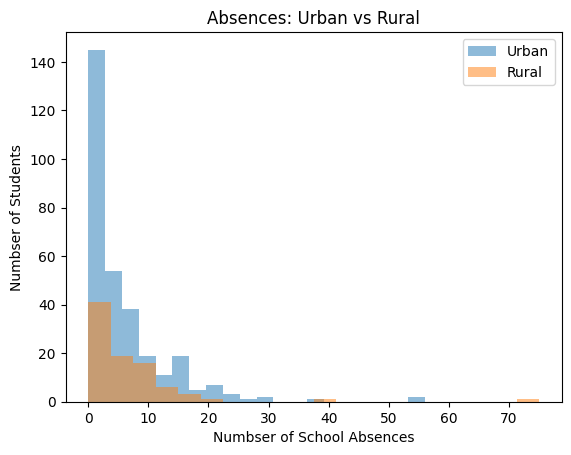

In [ ]:
# Histogram comparing absences for urban (U) and rural (R) students
abs_U = math_score.loc[math_score["address"] == "U", "absences"] #series for urban
abs_R = math_score.loc[math_score["address"] == "R", "absences"] #series for rural
abs_U.plot.hist(bins = 20, alpha = 0.5, label = "Urban",
                    title = "Absences: Urban vs Rural")
abs_R.plot.hist(bins = 20, alpha = 0.5, label = "Rural")
plt.xlabel("Numbser of School Absences")
plt.ylabel("Numbser of Students")
plt.legend()

The distribution indicates that urban students tend to have fewer school absences than rural students. However, both groups are heavily right-skewed, with most students showing relatively low numbers of absences.

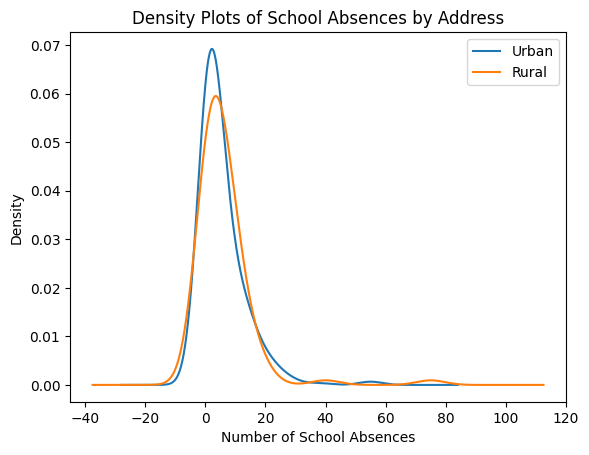

In [ ]:
# kernel density plots comparing absences for student address (urban vs rural)
abs_U.plot.density(bw_method = 0.5, label = "Urban")
abs_R.plot.density(bw_method = 0.5, label = "Rural")
plt.title("Density Plots of School Absences by Address")
plt.xlabel("Number of School Absences")
plt.legend()

The density curves overlap heavily, indicating similar absence distributions overall. However, the urban curve is slightly shifted to the left, suggesting urban students tend to have fewer absences on average than rural students.

Text(0.5, 0.98, '')

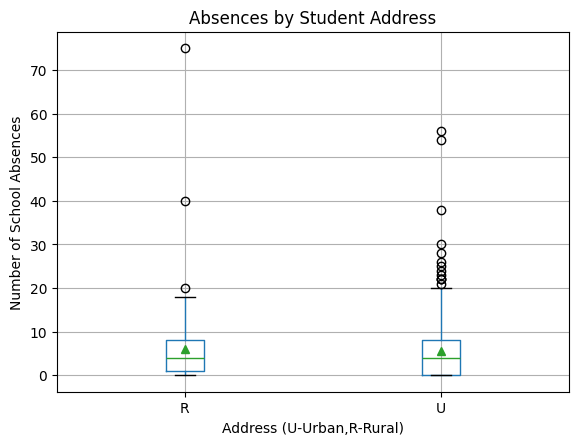

In [ ]:
import matplotlib.pyplot as plt
#boxplot comparing absences for student address (urban vs rural)
math_score.boxplot(column = "absences", by = "address", showmeans = True)
plt.ylabel("Number of School Absences")
plt.xlabel("Address (U-Urban,R-Rural)")
plt.title("Absences by Student Address")
plt.suptitle("") # Suppress the default suptitle generated by boxplot

The boxplot shows that urban students have a slightly higher central tendency (both mean and median) in the number of absences compared to rural students. While the interquartile ranges are similar for both groups, urban students exhibit more extreme values, as indicated by a larger number of high-end outliers.

Next, we will create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by
a categorical variable in each. Add appropriate labels and titles.

Text(0, 0.5, 'G3 Scores')

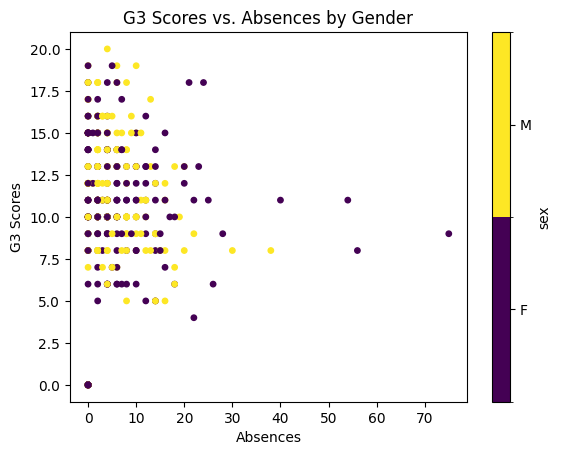

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot of absence and G3 by sex
math_score.plot.scatter(x = "absences", y = "G3", c = "sex", cmap = "viridis", s = 15)

# Add title and labels
plt.title("G3 Scores vs. Absences by Gender")
plt.xlabel("Absences")
plt.ylabel("G3 Scores")

The scatter plot indicates a weak negative association between number of school absences and final (G3) scores, with higher absence counts generally corresponding to lower scores. When stratified by gender, the data points show overlap, with no clear differences in score levels or trends across absences. Overall, this suggests that gender does not meaningfully modify the relationship between absences and final scores.

Text(0, 0.5, 'G3 Scores')

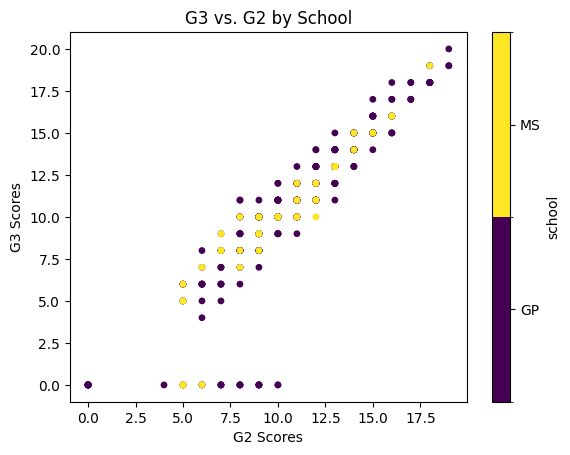

In [ ]:
math_score.plot.scatter(x = "G2", y = "G3", c = "school", colormap="viridis", s = 15)
plt.title("G3 vs. G2 by School")
plt.xlabel("G2 Scores")
plt.ylabel("G3 Scores")

The scatter plot shows a strong positive association between second period (G2) and final (G3) scores, with higher G2 scores corresponding to higher G3 scores across both schools (GP and MS). When stratified by school, the data points largely overlap, with no clear differences in score levels or trends between schools. Overall, this suggests that school does not meaningfully modify the relationship between G2 and G3 scores.

# Plotting the NFL Data

## Read in the data
First, we will use the [URL](https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv) to read in a data set about `NFL` games into a colab notebook. The data has information about games from 2002 to 2014.





In [ ]:
#read in NFL data
import pandas as pd
scores = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
scores.head() #check the first few observations

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


We will convert `homeTeam`, `awayTeam`, `day`, `stadium`, `startTime`, `toss`, `roof`, and `surface` vriables to category
type variables. We can do that quickly using the `.apply()` method and a `lambda` function.

In [ ]:
#Convert categorical variables into cateogry type variables
scores[["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]] = (
    scores[["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]]
    .apply(lambda x: x.astype("category"))
)

#check the variable types after conversion
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3471 entries, 0 to 3470
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   week             3471 non-null   object  
 1   date             3471 non-null   object  
 2   day              3471 non-null   category
 3   season           3471 non-null   int64   
 4   awayTeam         3471 non-null   category
 5   AQ1              3471 non-null   int64   
 6   AQ2              3471 non-null   int64   
 7   AQ3              3471 non-null   int64   
 8   AQ4              3471 non-null   int64   
 9   AOT              3471 non-null   int64   
 10  AOT2             3471 non-null   int64   
 11  AFinal           3471 non-null   int64   
 12  homeTeam         3471 non-null   category
 13  HQ1              3471 non-null   int64   
 14  HQ2              3471 non-null   int64   
 15  HQ3              3471 non-null   int64   
 16  HQ4              3471 non-null   int64   


## Summarize the data
We will examine trends during the regular season, so we remove any observations where the week is not between 1 and 17. Because the week variable is not stored as numeric, we first coerce it to a numeric type before subsetting the data.

In [ ]:
import pandas as pd
sub_scores = scores[
    (pd.to_numeric(scores["week"], errors='coerce') >= 1) &
    (pd.to_numeric(scores["week"], errors='coerce') <= 17)]
sub_scores.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


Next, we will summarize some of the variables (AFinall, HFinal, AtotalYds, HtotalYds) grouped by season and week, season alone, and week alone (three different scenarios).
- Produce some common numeric summaries of variables across these different groups.
- Similarly, produce some common plots over time (mostly line plots I'd think!)

In [ ]:
import pandas as pd
#summarize variables (AFinal, HFinal,AtotalYds, HtotalYds) grouped by season and week
# Ensure sub_scores is a real copy
sub_scores = sub_scores.copy()
# Create numeric week column
sub_scores["week"] = pd.to_numeric(sub_scores["week"], errors="coerce")

# Grouped summaries
sweek_score = (sub_scores.groupby(["season", "week"])[["AFinal", "HFinal", "AtotalYds", "HtotalYds"]]
              .agg(["count", "mean", "median", "std"]).round(2))
sweek_score_flat = sweek_score.copy()
sweek_score_flat.columns = [f"{v}_{stat}" for v, stat in sweek_score.columns]
sweek_score_flat.head()

AFinal_count  AFinal_mean  AFinal_median  AFinal_std  \
season week                                                         
2002   1               16        23.12           23.0        9.68   
       2               16        22.69           23.5       12.35   
       3               14        19.57           22.0       11.77   
       4               14        18.93           19.0        8.94   
       5               14        24.00           23.0       10.36   

             HFinal_count  HFinal_mean  HFinal_median  HFinal_std  \
season week                                                         
2002   1               16        26.12           27.0       11.05   
       2               16        18.19           16.5       10.39   
       3               14        24.43           27.0       11.46   
       4               14        28.29           27.0       14.19   
       5               14        23.21           25.5        8.44   

             AtotalYds_count  AtotalYds_mean  AtotalYds_median  AtotalYds_std  \
season week                                                                     
2002   1                  16          310.00             286.0          70.39   
       2                  16          340.94             352.0         109.56   
       3                  14          299.21             303.0          86.95   
       4                  14          344.07             351.0          74.43   
       5                  14          379.57             385.0          78.27   

             HtotalYds_count  HtotalYds_mean  HtotalYds_median  HtotalYds_std  
season week                                                                    
2002   1                  16          348.62             352.0          78.04  
       2                  16          306.81             285.0          88.10  
       3                  14          322.57             324.0          88.11  
       4                  14          346.86             362.0          82.45  
       5                  14          341.57             329.5          71.47

Text(0.5, 1.0, 'Average Final Scores over Season & Week')

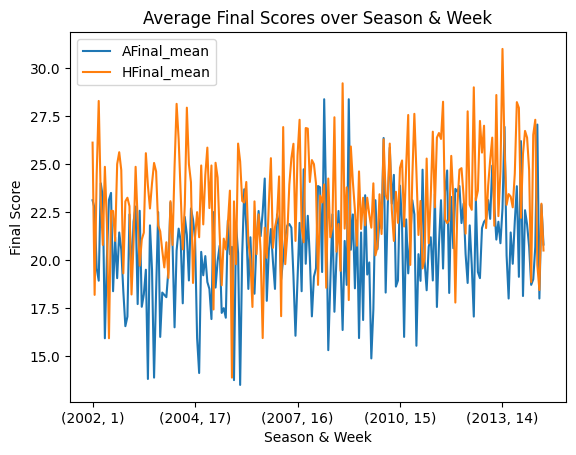

In [ ]:
sweek_score_flat[['AFinal_mean','HFinal_mean']].plot()
plt.xlabel("Season & Week")
plt.ylabel("Final Score")
plt.title("Average Final Scores over Season & Week")

In [ ]:
import pandas as pd
#summarize variables (AFinal, HFinal,AtotalYds, HtotalYds) grouped by season
# Grouped summaries
s_score = (sub_scores.groupby(["season"])[["AFinal", "HFinal", "AtotalYds", "HtotalYds"]]
              .agg(["count", "mean", "median", "std"]).round(2))

s_score_flat = s_score.copy()
s_score_flat.columns = [f"{v}_{stat}" for v, stat in s_score_flat.columns]
s_score_flat.head()

,AFinal_count,AFinal_mean,AFinal_median,AFinal_std,HFinal_count,HFinal_mean,HFinal_median,HFinal_std,AtotalYds_count,AtotalYds_mean,AtotalYds_median,AtotalYds_std,HtotalYds_count,HtotalYds_mean,HtotalYds_median,HtotalYds_std
season,,,,,,,,,,,,,,,,
2002,256,20.55,20.5,10.06,256,22.80,23.0,10.18,256,324.20,328.0,90.83,256,332.52,335.0,82.27
2003,256,19.05,19.0,10.25,256,22.61,23.0,10.12,256,306.58,309.5,88.55,256,330.02,326.0,74.66
2004,256,20.23,19.0,10.18,256,22.74,23.0,10.40,256,320.58,318.0,91.99,256,333.74,328.0,86.15
2005,256,18.79,19.0,9.95,256,22.44,21.0,9.80,256,307.97,304.0,82.49,256,323.87,320.0,81.72
2006,256,20.23,21.0,10.39,256,21.08,20.0,9.86,256,316.63,323.5,79.58,256,327.60,328.0,84.26


Text(0.5, 1.0, 'Average Final Scores over Season')

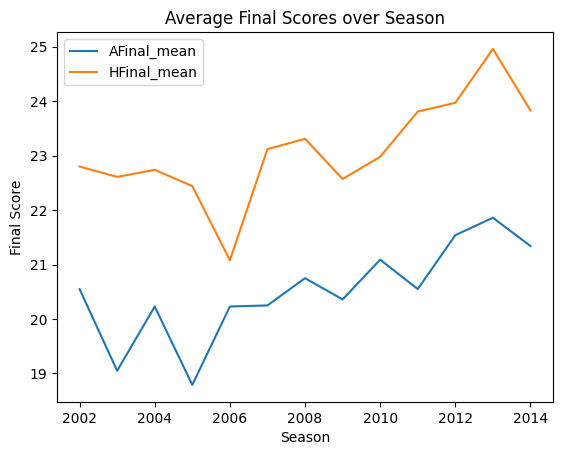

In [ ]:
import matplotlib.pyplot as plt
s_score_flat[['AFinal_mean','HFinal_mean']].plot()
plt.xlabel("Season")
plt.ylabel("Final Score")
plt.title("Average Final Scores over Season")

In [ ]:
import pandas as pd
#summarize variables (AFinal, HFinal,AtotalYds, HtotalYds) grouped by week(nweek)
# Grouped summaries
w_score = (sub_scores.groupby(["week"])[["AFinal", "HFinal", "AtotalYds", "HtotalYds"]]
              .describe().round(2))
w_score_flat = w_score.copy()
w_score_flat.columns = [f"{v}_{stat}" for v, stat in w_score_flat.columns]
w_score_flat.head()

,AFinal_count,AFinal_mean,AFinal_std,AFinal_min,AFinal_25%,AFinal_50%,AFinal_75%,AFinal_max,HFinal_count,HFinal_mean,...,AtotalYds_75%,AtotalYds_max,HtotalYds_count,HtotalYds_mean,HtotalYds_std,HtotalYds_min,HtotalYds_25%,HtotalYds_50%,HtotalYds_75%,HtotalYds_max
week,,,,,,,,,,,,,,,,,,,,,
1,208.0,19.72,8.98,0.0,13.0,20.0,26.00,41.0,208.0,22.14,...,380.00,622.0,208.0,330.89,82.72,129.0,271.5,327.5,389.00,568.0
2,207.0,19.55,10.43,0.0,10.0,20.0,27.00,48.0,207.0,22.84,...,374.50,539.0,207.0,351.00,85.86,117.0,286.5,346.0,411.00,604.0
3,198.0,20.77,9.63,0.0,13.0,23.0,27.00,44.0,198.0,22.65,...,396.75,583.0,198.0,342.27,83.60,86.0,280.0,345.0,396.75,536.0
4,184.0,20.98,10.06,0.0,14.0,20.0,27.25,55.0,184.0,24.09,...,396.25,580.0,184.0,347.94,81.35,145.0,297.0,346.5,401.00,558.0
5,182.0,20.53,10.30,0.0,13.0,20.5,27.00,51.0,182.0,24.32,...,396.25,517.0,182.0,341.42,86.48,107.0,279.0,339.5,400.00,621.0


Text(0.5, 1.0, 'Average Final Scores over Week')

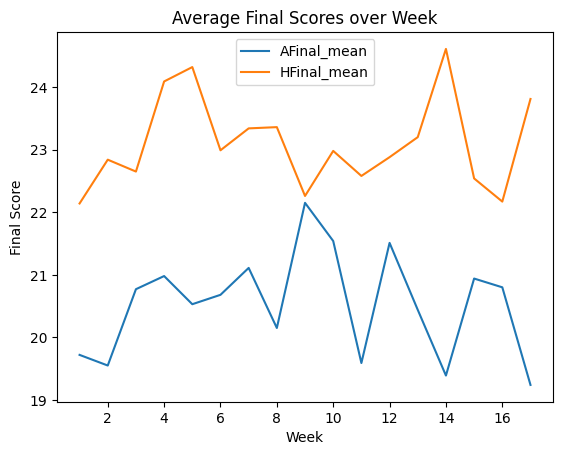

In [ ]:
w_score_flat[['AFinal_mean','HFinal_mean']].plot()
plt.xlabel("Week")
plt.ylabel("Final Score")
plt.title("Average Final Scores over Week")

We will write functions to create line plot for the data

we will define timeit() function to count the time for processing new fundtion

In [ ]:
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

The we qill apply `timeit` function to our creating line plot function

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

@timeit
def sum_plot(args: str, df: pd.DataFrame, group: str | list[str]):
    """
    Create line plots of summary statistics for numerical variables
    across one or more grouping variables.

    If 'week' is one of the grouping variables, it is coerced to numeric so week ordering
    is 1,2,3,... rather than 1,10,11,...
    """
    df_temp = df.copy() #copy data to avoid changing the original dataframe

    summaries = df_temp.groupby(group).agg(
        Mean=(args, "mean")).sort_index()

    ax = summaries.plot()
    group_label = group if isinstance(group, str) else ", ".join(group)
    ax.set_title(f"Average {args} over {group_label}")
    ax.set_ylabel(args)
    ax.legend(loc='upper right') # Set legend position to upper right
    return ax

sum_plot ran in 0.035782 seconds


<Axes: title={'center': 'Average AFinal over season'}, xlabel='season', ylabel='AFinal'>

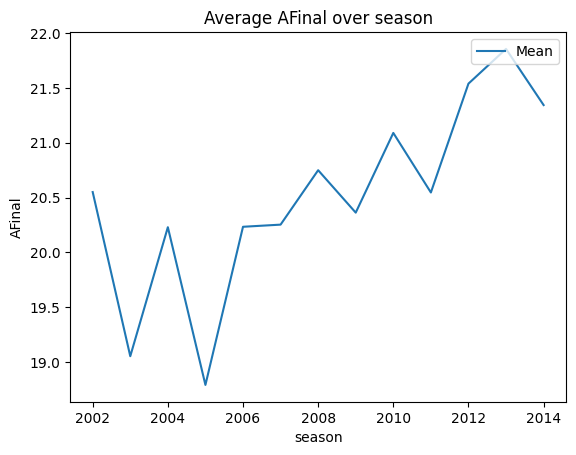

In [109]:
sum_plot(args ="AFinal", df = sub_scores, group = ["season"])

sum_plot ran in 0.052275 seconds


<Axes: title={'center': 'Average HFinal over week'}, xlabel='week', ylabel='HFinal'>

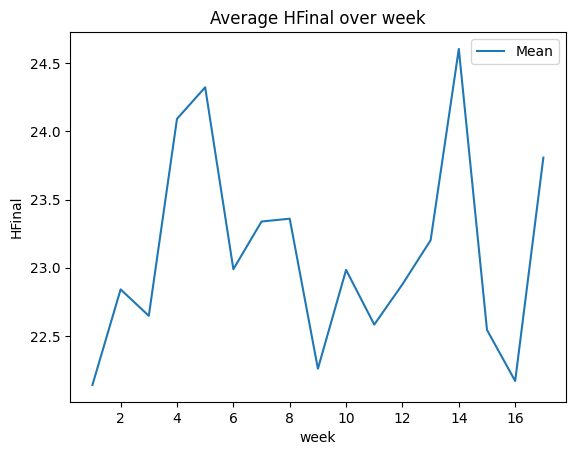

In [110]:
sum_plot(args ="HFinal", df = sub_scores, group = ["week"])

sum_plot ran in 0.046189 seconds


<Axes: title={'center': 'Average AFinal over season, week'}, xlabel='season,week', ylabel='AFinal'>

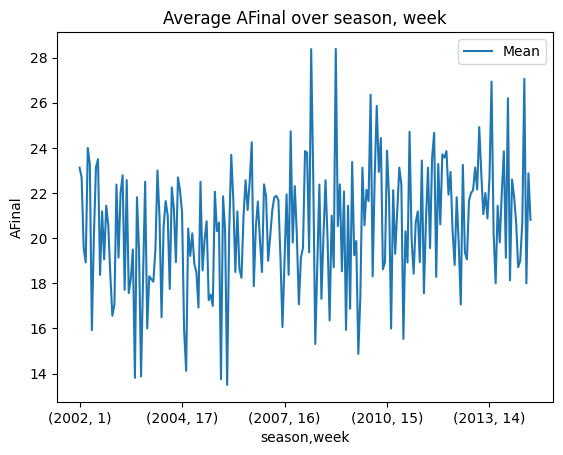

In [111]:
sum_plot(args ="AFinal", df = sub_scores, group = ["season", "week"])